In [ ]:
# CLUSTERING

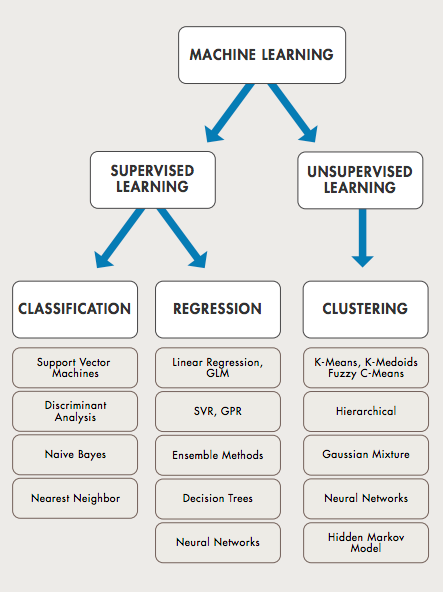

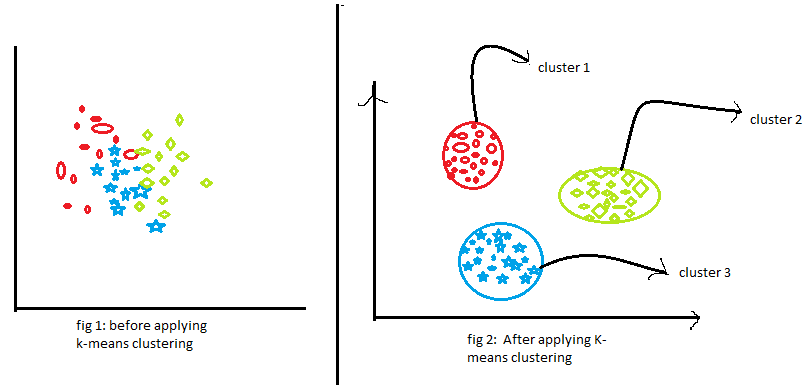

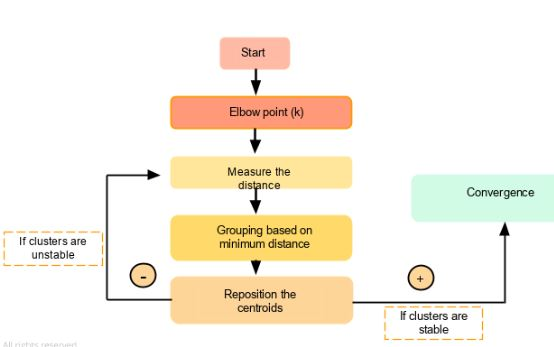

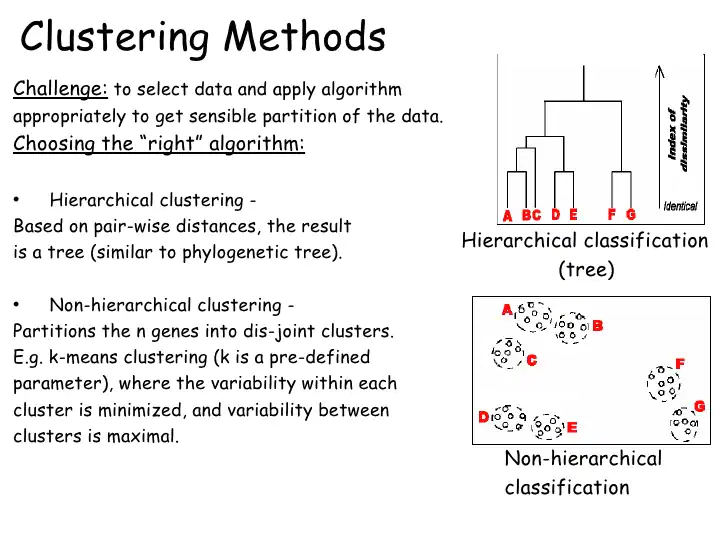

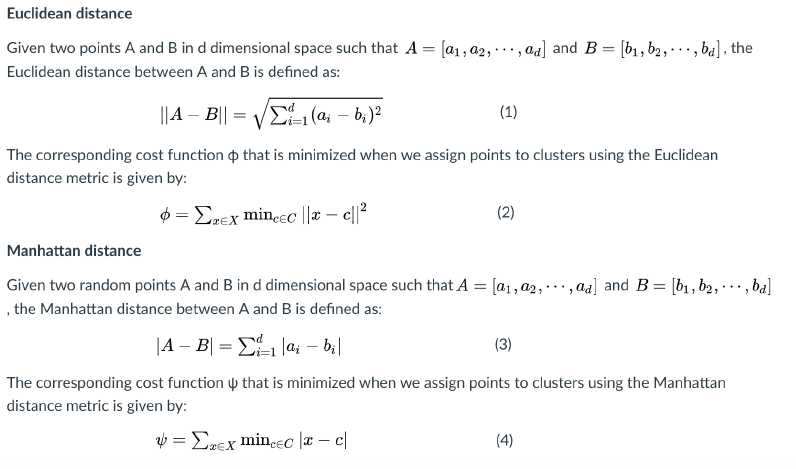

# hierachical clustering

In [2]:
# all the individual data points assign to a single cluster

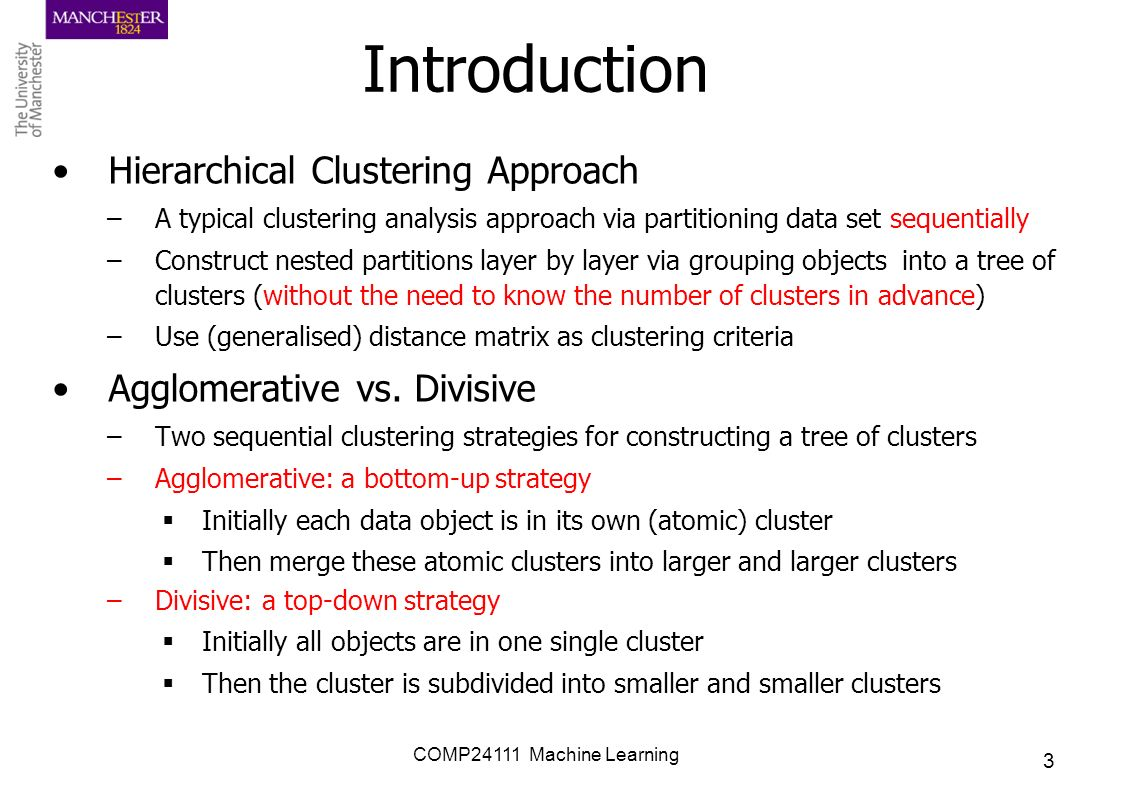

# proximity matrix

distance between the items to which row j and column k correspond

root of (1st -2nd)^2


In [88]:
# customer segmentation 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [89]:
a=pd.read_csv('Cust_Spend_Data.csv')
a

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3
5,6,F,4000,3,0,1,8
6,7,G,2500,5,0,11,2
7,8,H,2500,3,0,1,1
8,9,I,2000,2,0,2,2
9,10,J,1000,4,0,1,7


In [90]:
a.shape

(10, 7)

In [91]:
a=a.drop(['Cust_ID','Name'],axis=1)
a

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3
5,4000,3,0,1,8
6,2500,5,0,11,2
7,2500,3,0,1,1
8,2000,2,0,2,2
9,1000,4,0,1,7


In [92]:
from scipy.stats import zscore

In [69]:
a=a.apply(zscore)
a

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033
5,-0.311364,-0.620174,-0.654654,-0.741433,1.380131
6,-0.860829,0.620174,-0.654654,1.505333,-0.690066
7,-0.860829,-0.620174,-0.654654,-0.741433,-1.035098
8,-1.043984,-1.240347,-0.654654,-0.516756,-0.690066
9,-1.410294,0.000000,-0.654654,-0.741433,1.035098


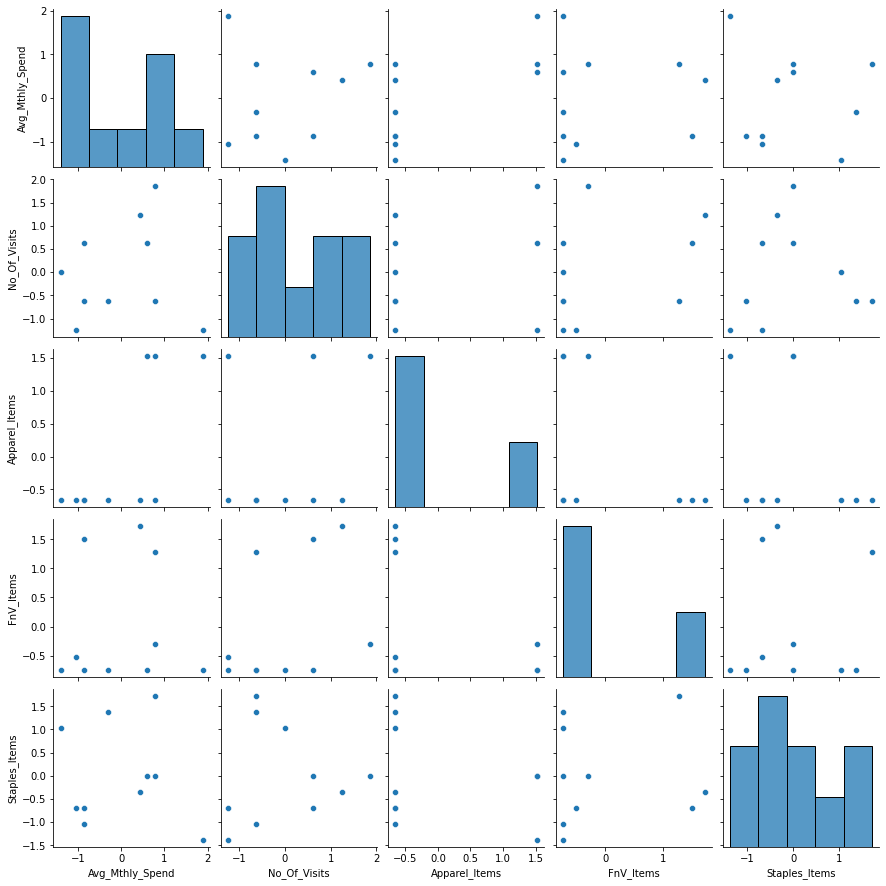

In [70]:
sns.pairplot(a)

In [93]:
from sklearn.cluster import AgglomerativeClustering

In [94]:
model=AgglomerativeClustering(n_clusters=2,linkage='average')

In [95]:
model.fit(a)

AgglomerativeClustering(linkage='average')

In [96]:
a['labels']=model.labels_
a.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
0,10000,2,1,1,0,0
1,7000,3,0,10,9,0
2,7000,7,1,3,4,0
3,6500,5,1,1,4,0
4,6000,6,0,12,3,0


In [97]:
a1=a.groupby(['labels'])
a1

In [98]:
a1.mean()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
labels,,,,,
0,7300.0,4.6,0.6,5.4,4.0
1,2400.0,3.4,0.0,3.2,4.0


In [99]:
 from scipy.cluster.hierarchy import cophenet,dendrogram,linkage

In [100]:
from scipy.spatial.distance import pdist
# pair wise distribution plot

In [101]:
# cophenet measure the corelation between distance of points and distance on dendrogram
# closer it is to 1, the better is the clustering

In [102]:
Z = linkage(a, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(a))

c

0.8083168200020935

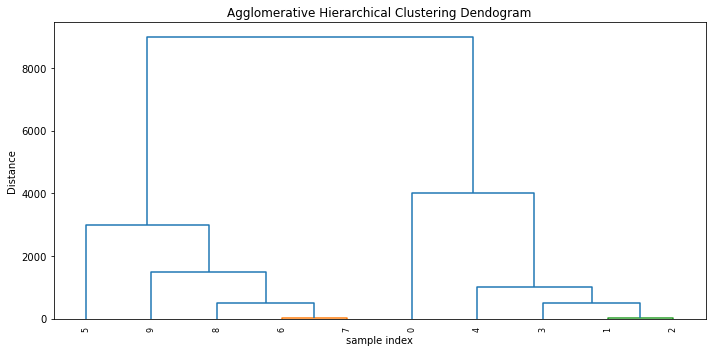

In [103]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [104]:
Z = linkage(a, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(a))

c

0.8013284924845823

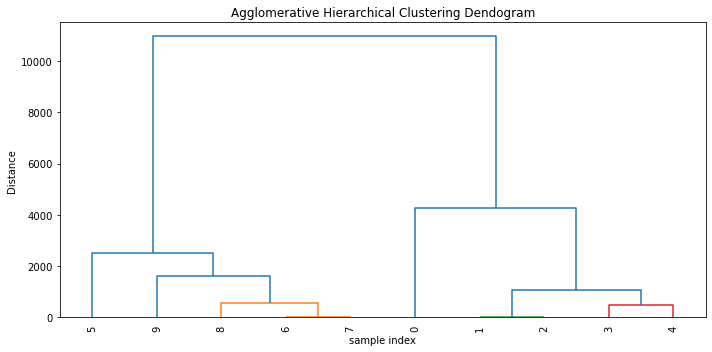

In [105]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()